<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Flavio Palacios y
    Diego Pintor.

**Fecha:** 1 de Marzo del 2021.

**Expediente** : if729825, 
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase 10

## Link de github
[Github](https://github.com/Palacios-F/ProyectoConjunto_PalaciosFC_PintorD)

## Instrucciones

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
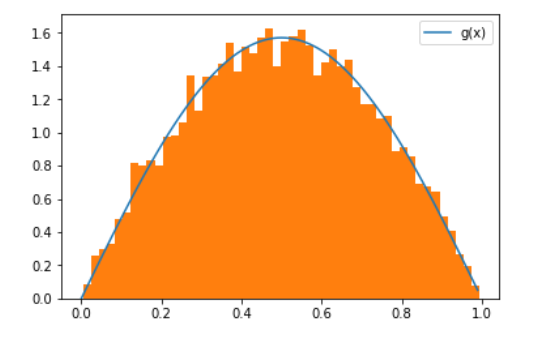
5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
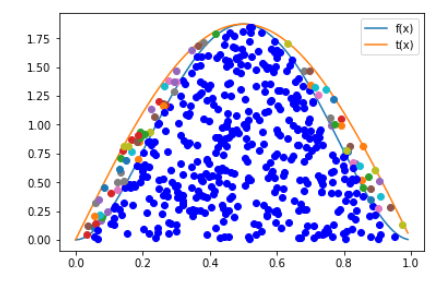
6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir
7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

### Anexo demostraciones

> ## <font color ='red'>Tarea: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$


> ## <font color ='red'>Tarea
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.
    

### Respuesta 1 Flavio Palacios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

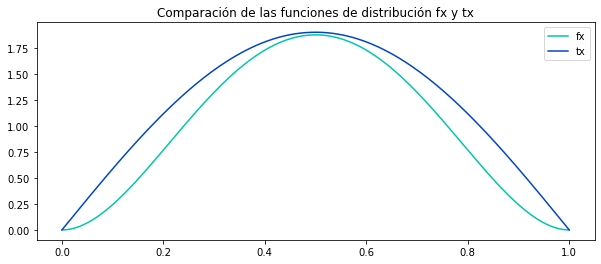

In [2]:
#Tomando un valor arbitrario de a que se acerque a la función f(x)
a = 1.90
f = lambda x: 30*(x**2-2*x**3+x**4)
t = lambda x: a*np.sin(np.pi*x)

x = np.linspace(0,1,200)
plt.figure(figsize=[10,4])
plt.plot(x,f(x), color = '#00C7AC', label = 'fx')
plt.plot(x,t(x), color = '#0045C7',label = 'tx')
plt.title('Comparación de las funciones de distribución fx y tx')
plt.legend()
plt.show()

### Respuesta 1 Diego Pintor

### Respuesta 2 Flavio Palacios

Siendo $t(x)= a\sin(\pi x)$ entonces:
  
$$c = \int_{-\infty}^{\infty}t(x)=a\int_{-\infty}^{\infty}\sin(\pi x) dx$$
  
como $f(x)$ es una función de densidad de probabilidad solamente para el rango $0 \leq x \leq 1$ entonces queda de la siguiente manera:
  
$$c =a\int_{0}^{1}\sin(\pi x) dx = \frac{\pi}{2a}$$
  
entonces $g(x)$ queda de la siguiente manera:
$$g(x)=\frac{t(x)}{c}=\frac{a\sin(\pi x)}{\frac{\pi}{2a}}=\frac{\pi}{2}\sin(\pi x)$$
  
Se comprueba que $g(x)$ es una densidad dado que:

$$\frac{\pi}{2} \int_{0}^{1}\sin(\pi x) dx = 1$$

### Respuesta 2 Diego Pintor

### Respuesta 3 Flavio Palacios

Siendo $g(x)$ la función de distribución entonces $G(x)$ la función de distribución acumulada:

$$G(x)= \int_{0}^{x} \frac{\pi}{2}\sin(\pi x) dx = \frac{-\cos(\pi x)+1}{2}$$

Teniendo ya la función de distribución acumulada entonces usamos el método de la transformada inversa:

$$G(x)=\frac{-\cos(\pi x)+1}{2} = U$$
$$-\cos(\pi x)+1 = 2U$$
$$-\cos(\pi x) = 2U-1$$
$$cos(\pi x) = -2U+1$$
$$\pi x = \cos^{-1}(-2U+1)$$
$$ x = \frac{\cos^{-1}(-2U+1)}{\pi}, 0 \leq U \leq 1$$

### Respuesta 3 Diego Pintor

### Respuesta 4 Flavio Palacios

In [3]:
def trans(N: 'Número de muestras'):
    return (np.arccos(-2*np.random.rand(N)+1))/np.pi

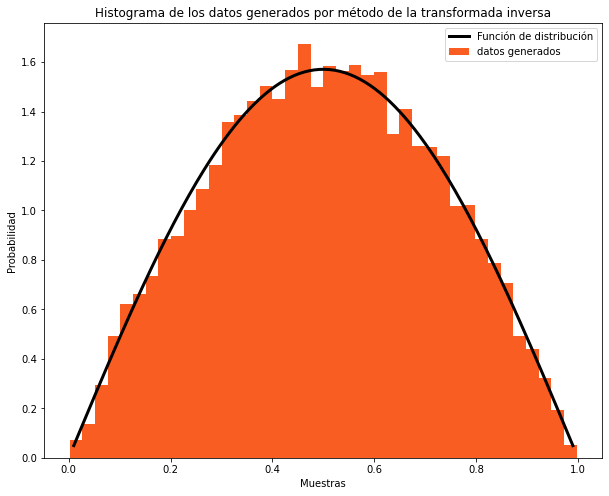

In [4]:
# Generación de datos
N = 10000
comprobacion = trans(N)

# Gráfica del histograma y de la función
plt.figure(figsize = (10,8))
plt.hist(comprobacion,bins = 40, color = '#FA5D22', density = True, label = 'datos generados')
x = np.linspace(0.01,0.99,200)
y = lambda x: (np.pi/2)*np.sin(np.pi*x)
plt.plot(x,y(x),'k',lw = 3,  label = 'Función de distribución')
plt.title('Histograma de los datos generados por método de la transformada inversa')
plt.ylabel('Probabilidad')
plt.xlabel('Muestras')
plt.legend()
plt.show()

### Respuesta 4 Diego Pintor

### Respuesta 5 Flavio Palacios

In [5]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

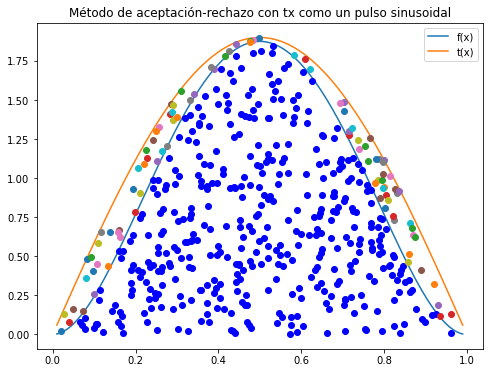

In [6]:
N = 500
R2 = np.random.rand(N)
R1 = trans(N)

#Gráfica del método junto con las funciones
plt.figure(figsize= (8,6))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
plt.title('Método de aceptación-rechazo con tx como un pulso sinusoidal')
aprob = Acep_rechazo(R2,R1,f,t)
plt.show()

### Respuesta 5 Diego Pintor

### Respuesta 6 Flavio Palacios

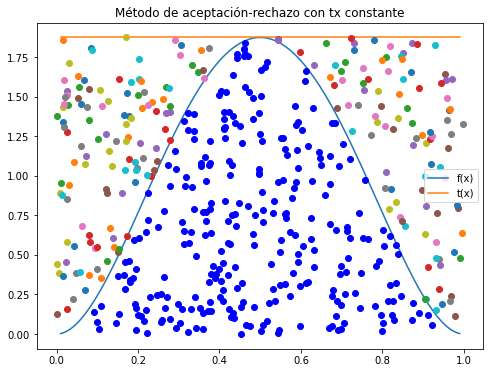

In [7]:
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
tc = lambda x: max_f * np.ones([len(x)])
R1 = np.random.rand(N)
R2 = np.random.rand(N)


plt.figure(figsize= (8,6))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,tc(x),label='t(x)')
plt.legend()
plt.title('Método de aceptación-rechazo con tx constante')
aprobc = Acep_rechazo(R2,R1,f,tc)
plt.show()

In [8]:
porcentaje = len(aprob)/N
porcentaje2 = len(aprobc)/N
porcentaje, porcentaje2

(0.812, 0.564)

En vista a los resultados se puede observar que utilizando como función t(x) el pulso senoidal se puede reducir considerablemente el porcentaje de datos rechazados generados lo que puede hacer que el método sea más eficiente

### Respuesta 6 Diego Pintor

### Respuesta 7 Flavio Palacios

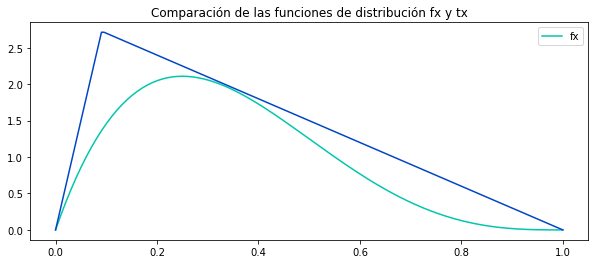

In [9]:
#Consiserando las funcion tx propuesta de la siguiente manera de tal forma que se aproxime a f(x)
f2 = lambda x: 20*x*(1-x)**3
t2 = lambda x: 30*x if x < (1/11) else (3*(1-x))

x = np.linspace(0,1,200)
y = list(map(lambda x: t2(x),x))
plt.figure(figsize=[10,4])
plt.plot(x,f2(x), color = '#00C7AC', label = 'fx')
plt.plot(x,y, color = '#0045C7')
plt.title('Comparación de las funciones de distribución fx y tx')
plt.legend()
plt.show()

Entonces:
  
$$c = \int_{-\infty}^{\infty}t(x)=\int_{-\infty}^{\infty} f(x)dx$$
  
como $f(x)$ es una función de densidad de probabilidad solamente para el rango $0 \leq x \leq 1$ y como es por partes queda de la siguiente manera:
  
$$c_1 =\int_{0}^{\frac{1}{11}}30x dx = \frac{15}{121}$$
$$c_2 =\int_{\frac{1}{11}}^{1}3-3x dx = \frac{150}{121}$$
  
entonces $g(x)$ queda de la siguiente manera:
$$
g(x)=
\begin{cases}
22x, & 0<x<\frac{1}{11} \\
\frac{11}{5}(1-x), & \frac{1}{11} \le x < 1 \\
\end{cases}
$$
  
Se comprueba que $g(x)$ es una densidad dado que:

$$22\int_{0}^{\frac{1}{11}}x dx+\frac{11}{5}\int_{\frac{1}{11}}^{1}(1-x) dx = 1$$

Siendo $g(x)$ la función de distribución entonces $G(x)$ la función de distribución acumulada:

$$
G(x)=
\begin{cases}
11x^2, & 0<x<\frac{1}{11} \\
\frac{11}{5}(x-\frac{x^2}{2})-\frac{1}{10}, & \frac{1}{11} \le x < 1 \\
\end{cases}
$$
  

Teniendo ya la función de distribución acumulada entonces usamos el método de la transformada inversa:
$$
G^{-1}(x)=
\begin{cases}
\sqrt{\frac{U}{11}}, & 0<U<\frac{1}{11} \\
-\frac{5 \sqrt{\frac{22-22U}{5}}}{11}+1, & \frac{1}{11} \le U < 1 \\
\end{cases}
$$

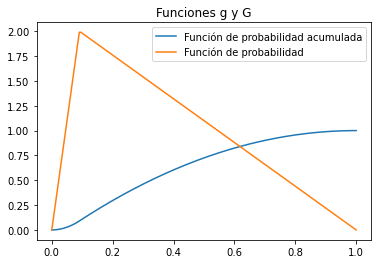

In [10]:
# Funciones
g = lambda x: 22*x if x < (1/11) else ((11/5) - (11/5)*x)
G = lambda x: 11*x**2 if x < (1/11) else ((11/5)*x - (11/10)*(x**2)-(1/10))

#Gráfica
x = np.linspace(0,1,200)
y = list(map(lambda x: G(x),x))
y2 = list(map(lambda x: g(x),x))
plt.plot(x,y, label = 'Función de probabilidad acumulada')
plt.plot(x,y2, label = 'Función de probabilidad')
plt.title('Funciones g y G')
plt.legend()
plt.show()

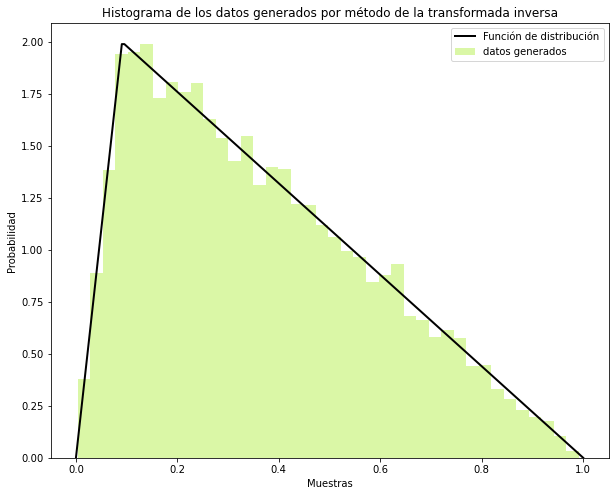

In [11]:
# Función G inversa
G_inv = lambda u: np.sqrt(u/11) if u < 1/11 else 1 - (5/11)*np.sqrt((22-22*u)/5)

# Generación de datos
N = 10000
comprobacion = np.array(list(map(lambda x: G_inv(x),np.random.rand(N))))

# Gráfica del histograma y de la función
plt.figure(figsize = (10,8))
plt.hist(comprobacion,bins = 40, color = '#DAF7A6', density = True, label = 'datos generados')
x = np.linspace(0,1,200)
y = list(map(lambda x: g(x),x))
plt.plot(x,y,'k',lw = 2,  label = 'Función de distribución')
plt.title('Histograma de los datos generados por método de la transformada inversa')
plt.ylabel('Probabilidad')
plt.xlabel('Muestras')
plt.legend()
plt.show()

In [12]:
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    """
    Función de rechazo que hace el cambio para funciones a trozos
    """
    f_x = f(R1)
    t_x = np.array(list(map(lambda x: t(x),R1)))
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

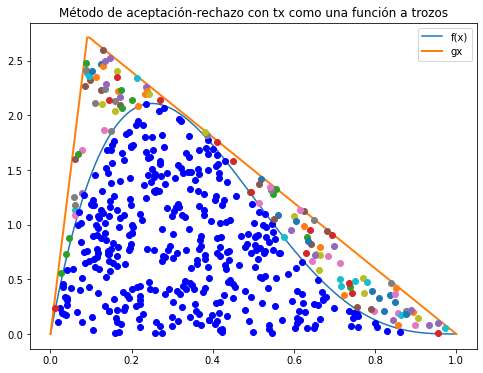

In [13]:
N = 500
R2 = np.random.rand(N)
R1 = np.array(list(map(lambda x: G_inv(x),np.random.rand(N))))

#Gráfica del método junto con las funciones
plt.figure(figsize= (8,6))
plt.plot(x,f2(x),label='f(x)')
y = list(map(lambda x: t2(x),x))
plt.plot(x,y,lw = 2,  label = 'gx')
plt.title('Método de aceptación-rechazo con tx como una función a trozos')
plt.legend()
aprob = Acep_rechazo2(R2,R1,f2,t2)

plt.show()

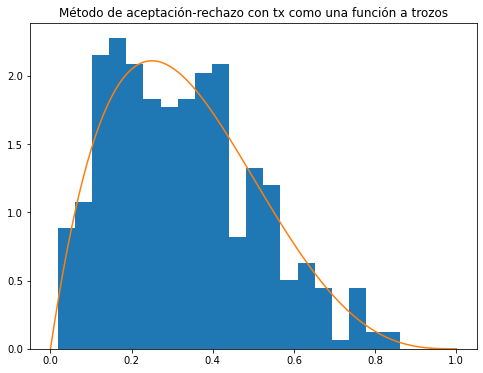

In [14]:
plt.figure(figsize= (8,6))
plt.hist(aprob, bins = 20, density = True)
plt.plot(x,f2(x),label='f(x)')
plt.title('Método de aceptación-rechazo con tx como una función a trozos')
plt.show()

### Respuesta 7 Diego Pintor

### Anexo demostraciones Flavio Palacios
Si consideramos que la distribución binomial distribuye de la siguiente manera:
    
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$    
$$p_{i+1}=\frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)} $$
Acomodando todo un poco nos queda
    
$$p_{i+1}=\frac{n!(n-i)}{(i+1)i!(n-i)!}p^{i}p(1-p)^{n-i}(1-p)^{-1}$$
    
Y reacomodando las partes nos queda finalmente la expresión 
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$
    
Al ser recursivo nos permite saltarnos el tremendo coste computacional que se necesitaría cada vez que se calculase grandes números debido a los factoriales que estan inmersos dentro de la función además de que se evitarían fallos por grandes números en los factoriales.

Dado que:
$$P(k)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$

entonces:

$$P(k+1)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$
    
$$P(k+1)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(k+1)k!}$$

y separando

$$P(k+1)=\frac{\lambda}{k+1}P(k)$$

In [18]:
import pandas as pd

In [16]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

def P_acum_Poisson(lamb: 'Parametro lambda',k: 'Parametro k'):
    Pr = np.zeros(k+1)
    Pr[0] = np.exp(-lamb)
    def pr(i):
        nonlocal Pr
        Pr[i+1]=(lamb/(i+1))*Pr[i]
    [pr(i) for i in range(k)]
    return np.cumsum(Pr)

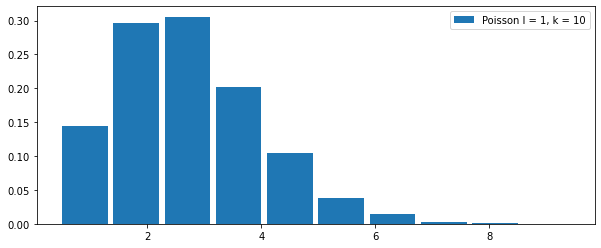

In [19]:
### Ejemplo
acum = P_acum_Poisson(2,10)
k = 10
N = 10000
c = Gen_distr_discreta(acum,np.arange(0, k+1),N)
plot_histogram_discrete(c,'Poisson l = 1, k = 10')